In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('metadata-clean-extracted.csv').drop(columns=['min_requirements', 'rec_requirements'])
df

name  steam_appid  \
0                   Clash of Warlords      1430720   
1      Mine Crazy: The Korean Grinder      1430740   
2                                Fade      1430100   
3           Clash: Artifacts of Chaos      1430680   
4                             Astatos      1430970   
...                               ...          ...   
91278                  Survive Avalon      1617600   
91279                   Cam Circle VR      1617770   
91280                      Neon Light      1617780   
91281                   G for Gravity      1617790   
91282                 Kin's Chronicle      1617800   

                                            descriptions  is_free  \
0      Join the Epic Battles in this most addicting t...    False   
1      This is the essence of Korean grinder MMO. Thi...    False   
2      Set in a small town in the Mid-west. You are a...    False   
3      ZENO EDITION About the Game You play as Pseudo...    False   
4      Astatos, a card-battling adventure filled with...    False   
...                                                  ...      ...   
91278  The big 1.5 update is coming in next month!We ...    False   
91279  Cam Circle VR is a mixed reality (MR) tool tha...    False   
91280  Neon Light is a 2D platformer with interesting...    False   
91281  Humankind is in danger! Asteroids hit and dest...     True   
91282  Development of this game has resumed as of Sep...     True   

       total_recommendations  num_languages  num_developers  num_publishers  \
0                          0              2               1               1   
1                          0              1               1               1   
2                          0              1               1               1   
3                        759             13               1               1   
4                        243              3               1               1   
...                      ...            ...             ...             ...   
91278                      0              1               1               1   
91279                      0              1               1               1   
91280                      0              1               1               1   
91281                      0              1               1               1   
91282                      0              1               1               1   

       num_genres  num_categories  ...  developers_12  developers_13  \
0               1               3  ...            1.0            0.0   
1               4               2  ...            1.0            0.0   
2               2               2  ...            1.0            1.0   
3               3               6  ...            0.0            1.0   
4               4               9  ...            1.0            1.0   
...           ...             ...  ...            ...            ...   
91278           2               3  ...            0.0            0.0   
91279           1               2  ...            1.0            0.0   
91280           3               3  ...            1.0            0.0   
91281           3               2  ...            0.0            0.0   
91282           4               9  ...            0.0            1.0   

       developers_14  developers_15  day  month  year  age   era   price  
0                1.0            1.0    7      2  2021    4  2020   699.0  
1                0.0            0.0    8     10  2020    5  2020   199.0  
2                0.0            1.0   29     10  2020    5  2020   199.0  
3                0.0            1.0    9      3  2023    2  2020  2999.0  
4                0.0            0.0   16     12  2021    4  2020  1499.0  
...              ...            ...  ...    ...   ...  ...   ...     ...  
91278            1.0            0.0   31      5  2021    4  2020  1299.0  
91279            1.0            0.0   16     11  2021    4  2020   299.0  
91280            1.0            0.0   17      5  2021    4  2020  

## Preprocessing

In [5]:
df['des_len'] = df['descriptions'].apply(lambda x: len(x))

In [6]:
df

name  steam_appid  \
0                   Clash of Warlords      1430720   
1      Mine Crazy: The Korean Grinder      1430740   
2                                Fade      1430100   
3           Clash: Artifacts of Chaos      1430680   
4                             Astatos      1430970   
...                               ...          ...   
91278                  Survive Avalon      1617600   
91279                   Cam Circle VR      1617770   
91280                      Neon Light      1617780   
91281                   G for Gravity      1617790   
91282                 Kin's Chronicle      1617800   

                                            descriptions  is_free  \
0      Join the Epic Battles in this most addicting t...    False   
1      This is the essence of Korean grinder MMO. Thi...    False   
2      Set in a small town in the Mid-west. You are a...    False   
3      ZENO EDITION About the Game You play as Pseudo...    False   
4      Astatos, a card-battling adventure filled with...    False   
...                                                  ...      ...   
91278  The big 1.5 update is coming in next month!We ...    False   
91279  Cam Circle VR is a mixed reality (MR) tool tha...    False   
91280  Neon Light is a 2D platformer with interesting...    False   
91281  Humankind is in danger! Asteroids hit and dest...     True   
91282  Development of this game has resumed as of Sep...     True   

       total_recommendations  num_languages  num_developers  num_publishers  \
0                          0              2               1               1   
1                          0              1               1               1   
2                          0              1               1               1   
3                        759             13               1               1   
4                        243              3               1               1   
...                      ...            ...             ...             ...   
91278                      0              1               1               1   
91279                      0              1               1               1   
91280                      0              1               1               1   
91281                      0              1               1               1   
91282                      0              1               1               1   

       num_genres  num_categories  ...  developers_13  developers_14  \
0               1               3  ...            0.0            1.0   
1               4               2  ...            0.0            0.0   
2               2               2  ...            1.0            0.0   
3               3               6  ...            1.0            0.0   
4               4               9  ...            1.0            0.0   
...           ...             ...  ...            ...            ...   
91278           2               3  ...            0.0            1.0   
91279           1               2  ...            0.0            1.0   
91280           3               3  ...            0.0            1.0   
91281           3               2  ...            0.0            1.0   
91282           4               9  ...            1.0            0.0   

       developers_15  day  month  year  age   era   price  des_len  
0                1.0    7      2  2021    4  2020   699.0      658  
1                0.0    8     10  2020    5  2020   199.0      545  
2                1.0   29     10  2020    5  2020   199.0      767  
3                1.0    9      3  2023    2  2020  2999.0     2102  
4                0.0   16     12  2021    4  2020  1499.0     1406  
...              ...  ...    ...   ...  ...   ...     ...      ...  
91278            0.0   31      5  2021    4  2020  1299.0      863  
91279            0.0   16     11  2021    4  2020   299.0      312  
91280            0.0   17      5  2021    4  2020   199.0      323  
91281            1.0   10      5  2021    4  2020  

In [7]:
df['des_len'].describe()

count    91283.000000
mean      1306.955643
std       1276.703326
min          1.000000
25%        670.000000
50%       1054.000000
75%       1632.000000
max      95352.000000
Name: des_len, dtype: float64

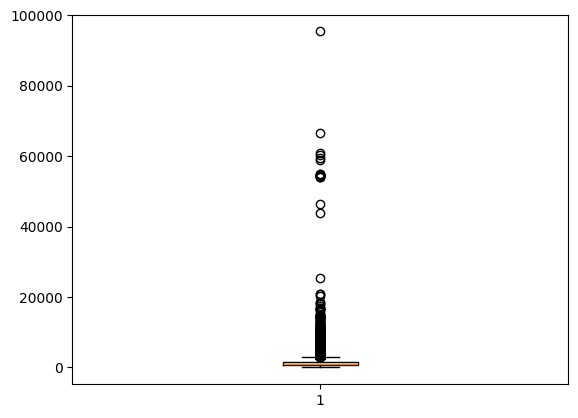

In [8]:
fig = plt.Figure(figsize=(10, 6))
plt.boxplot(df['des_len'])
plt.show()

In [9]:
df.sort_values(by='des_len', ascending=False)

name  steam_appid  \
75934                        Crazy Zombies      3216260   
4499   Aircraft Carrier Survival: Tutorial      1493800   
79748                                三界铲屎官      3367300   
79796                         Loop Defense      3431140   
20572                               地下城冒险记      2083570   
...                                    ...          ...   
29467                       VR Long March       1289890   
32142                          Hard West 2      1282410   
10172                           Quiet Town      1345520   
80055                         Zero Grounds      2402450   
40812              HIS (Heroes In the Sky)       342570   

                                            descriptions  is_free  \
75934  Looking for a bit of leisure and relaxation in...    False   
4499   [,,,,Take control of the aircraft carrier, its...     True   
79748  Welcome to "Cat Master" — a casual simulation ...    False   
79796  Game Introduction Welcome to "Loop Defense", a...    False   
20572  《地下城冒险记》是一款集休闲、Roguelike及养成、经营等诸多玩法的游戏。丰富多样的玩法...     True   
...                                                  ...      ...   
29467                                                 In    False   
32142                                                       False   
10172                                                  1    False   
80055                                                        True   
40812                                                  -     True   

       total_recommendations  num_languages  num_developers  num_publishers  \
75934                      0            103               1               1   
4499                       0              6               1               1   
79748                      0            103               1               1   
79796                      0            103               1               1   
20572                      0              2               1               1   
...                      ...            ...             ...             ...   
29467                      0              1               1               1   
32142                   2352              9               1               1   
10172                      0              1               1               1   
80055                      0              6               1               1   
40812                      0              1               1               1   

       num_genres  num_categories  ...  developers_13  developers_14  \
75934           3               2  ...            1.0            1.0   
4499            2               1  ...            1.0            0.0   
79748           4               2  ...            0.0            1.0   
79796           3               2  ...            0.0            0.0   
20572           6               3  ...            0.0            0.0   
...           ...             ...  ...            ...            ...   
29467           1               4  ...            0.0            0.0   
32142           3               5  ...            0.0            1.0   
10172           2               1  ...            1.0            0.0   
80055           4               5  ...            0.0            0.0   
40812           1               1  ...            0.0            1.0   

       developers_15  day  month  year  age   era    price  des_len  
75934            0.0   27      9  2024    1  2020     79.0    95352  
4499             1.0   31      3  2021    4  2020      0.0    66683  
79748            0.0    9     12  2024    1  2020     79.0    60785  
79796            1.0   26      1  2025    0  2020     99.0    60410  
20572            0.0   15      8  2022    3  2020      0.0    59407  
...              ...  ...    ...   ...  ...   ...      ...      ...  
29467            1.0    4     11  2020    5  2020  19999.0        2  
32142            0.0    4      8  2022    3  2020   2999.0        1  
10172            0.0    6     10  2022    3  2020    299

In [11]:
df[df['des_len'] > 16000]

name  steam_appid  \
912                                      Open Mod 2024.2      1591680   
4499                 Aircraft Carrier Survival: Tutorial      1493800   
15787                                         Baby Hands       708820   
20572                                             地下城冒险记      2083570   
20631                                    THE STARFIGHTER      2081600   
22793                                               风流霸业      1987130   
23419                                               SenS      1966170   
24474                                               乱入英雄      1935170   
25953                                           战甲online      1889420   
27442                                             小怪物必须死      1842990   
29836                                       MANIC MINERS       511070   
40538                                            Alganon       350660   
46228                                               塔尔战纪      2267620   
47038                                           史小坑的花前月下      2242590   
50234                                    Code R.U.B.I.K.      2140680   
53910                                     Be The Richest      2532200   
56258                              White Wings ホワイトウィングス      1185680   
57161                                            转生成为小菜鸡      3001050   
59573                                           逆乱水浒之山贼王      2459790   
59907          VR Travelling in 18th-19th Century Europe      1405960   
59945  The Heroic Legend of America: Second Revolutio...      2340720   
60252                          Vampire Memories - 吸血鬼的回忆      2329760   
64390                                     Adventure Time      3245350   
74683                                 Evochron Legacy SE       398170   
74752                                            Elsword       237310   
75934                                      Crazy Zombies      3216260   
79535                                               魔法餐厅      3397900   
79748                                              三界铲屎官      3367300   
79796                                       Loop Defense      3431140   
80048                                               卧龙觉醒      1982460   
80830             A Total War Saga: THRONES OF BRITANNIA       712100   
82532                             Soccer Online: Ball 3D       485610   

                                            descriptions  is_free  \
912    SUPPORTER DLC We've prepared a few things for ...     True   
4499   [,,,,Take control of the aircraft carrier, its...     True   
15787  Discord Community Index + Knuckles launch titl...    False   
20572  《地下城冒险记》是一款集休闲、Roguelike及养成、经营等诸多玩法的游戏。丰富多样的玩法...     True   
20631  WHAT IS THE STARFIGHTER?THE STARFIGHTER is a b...    False   
22793  客服联系方式：关注微信公众号“黑兔游戏”选择 人工客服或联系qq客服1903712845  ...     True   
23419  -.  ---  -  ....  ..  -.  --.  -.  .  ...  ......    False   
24474  客服qq：1903712845\r\n关注微信公众号“黑兔游戏”联系 人工客服\r\n《乱入...     True   
25953  客服QQ：1903712845\r\n关注公众VX号：“热门新游”  回复  1117  领...     True   
27442  客服qq:1903712845 或微信：qunhei03\r\n《小怪物必须死》是一款融合弹...     True   
29836  ----------Overview----------Welcome to "MANIC ...    False   
40538  INTRO Alganon is an old school fantasy MMORPG ...    False   
46228  《塔尔战纪》是一款由精英团队倾力打造的放置卡牌史诗巨作。\r\n二次元末日战争风格，拥有多个...     True   
47038  客服联系方式：1903712845关注微信公众号“黑兔游戏”选择 人工客服\r\n礼包领取公...     True   
50234  Welcome to Round-and-Units-Based Intelligent K...    False   
53910  is more than just a simple shop game. It offer...     True   
56258  ❄ Japanese E-mote Animation System. More than ...    False   
57161  《Reincarnated as a Rookie》is a game of fightin...     True   
59573   This game is based on the Water Margin. Playe...    False   
59907  Our excursion game contains multiple sub-games...    False   
59945  赞助欢迎支持这项工作，你的支持将使这个作品更加完善。About the Game The g...    False   
60252  --------------------------------------Introduc...    False   
64390  Welcome to Adventure Time, a jacked-up Rogue-l..